Average concentration drop per metal type:
   Metal  Average_Drop
0      A      0.000706
1      B      0.000679
2      C      0.000583
3      D      0.000736
4      E      0.000704
5      F      0.000672
6      G      0.000652
7      H      0.000664
8      J      0.000665
9      K      0.000802
10     M      0.000602
11     N      0.000593


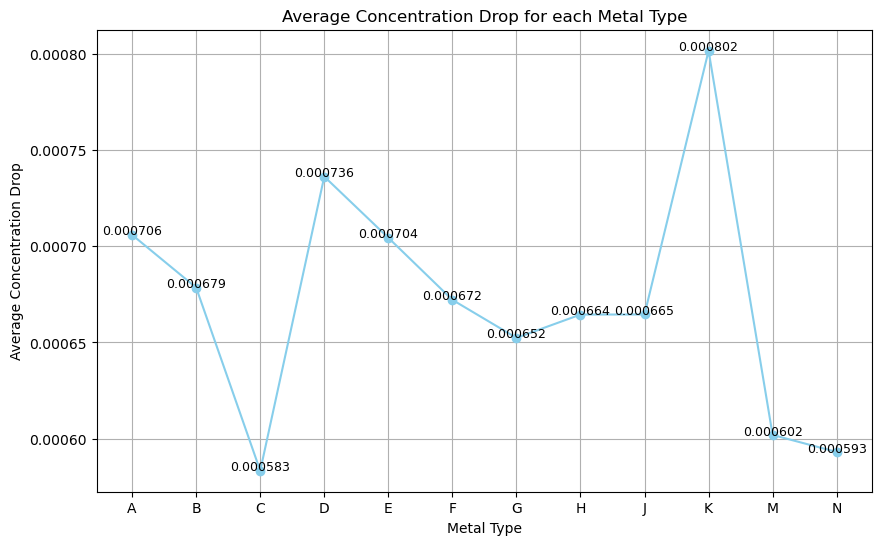

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a dataframe for the primary data
df = pd.DataFrame({
        'Set': [1,2,3,4,5],
        'Initial_Concentration':[3.4,3.2,3.15,3,2.85],
        'Final_Concentration':[3.2,3.15,3,2.85,2.8],
        'Metals':[
            {'A': 4, 'B': 25, 'C': 27, 'D': 4, 'E': 7, 'F': 13, 'G': 17, 'H': 20, 'J': 38, 'K': 14, 'M': 12, 'N': 12},
            {'A': 8, 'B': 24, 'C': 19, 'D': 2, 'E': 4, 'F': 7, 'G': 16, 'H': 20, 'J': 33, 'K': 1, 'M': 15, 'N': 17},
            {'A': 16, 'B': 39, 'C': 15, 'D': 5, 'E': 2, 'F': 12, 'G': 7, 'H': 26, 'J': 31, 'K': 19, 'M': 9, 'N': 9},
            {'A': 10, 'B': 21, 'C': 21, 'D': 3, 'F': 12, 'G': 12, 'H': 18, 'J': 17, 'K': 24, 'M': 12, 'N': 26},
            {'A': 2, 'B': 19, 'C': 49, 'D': 2, 'E': 2, 'F': 14, 'G': 11, 'H': 17, 'J': 23, 'K': 7, 'M': 16, 'N': 27}
        ]
       })
# Calculate Total Drop and add to the DataFrame
df['Total_Drop'] = df['Initial_Concentration'] - df['Final_Concentration']

# Initialize dictionaries for total drop and count of each metal type
metal_totals = {}
metal_counts = {}

# Iterate over each row in the DataFrame
for idx, row in df.iterrows():
    metals = row['Metals']
    total_drop = row['Total_Drop']
    num_metals = sum(metals.values())
    
    # Calculate the proportional drop for each metal
    for metal, count in metals.items():
        proportional_drop = total_drop * (count / num_metals)
        if metal in metal_totals:
            metal_totals[metal] += proportional_drop
            metal_counts[metal] += count
        else:
            metal_totals[metal] = proportional_drop
            metal_counts[metal] = count

# Calculate the average drop per metal type
average_drops = {metal: metal_totals[metal] / metal_counts[metal] for metal in metal_totals}

# Convert the results to a pandas DataFrame for easier manipulation
average_drops_df = pd.DataFrame(list(average_drops.items()), columns=['Metal', 'Average_Drop'])

# Display the average drops
print("Average concentration drop per metal type:")
print(average_drops_df)

# Plot the average drops
plt.figure(figsize=(10, 6))
plt.plot(average_drops_df['Metal'], average_drops_df['Average_Drop'], marker='o', linestyle='-', color='skyblue')
plt.title('Average Concentration Drop for each Metal Type')
plt.xlabel('Metal Type')
plt.ylabel('Average Concentration Drop')

# Annotate the points on the plot with the values
for idx, row in average_drops_df.iterrows():
    plt.text(row['Metal'], row['Average_Drop'], f'{row["Average_Drop"]:.6f}', fontsize=9, ha='center')

plt.grid(True)
plt.show()
